In [ ]:
import numpy as np
import matplotlib.pyplot as plt

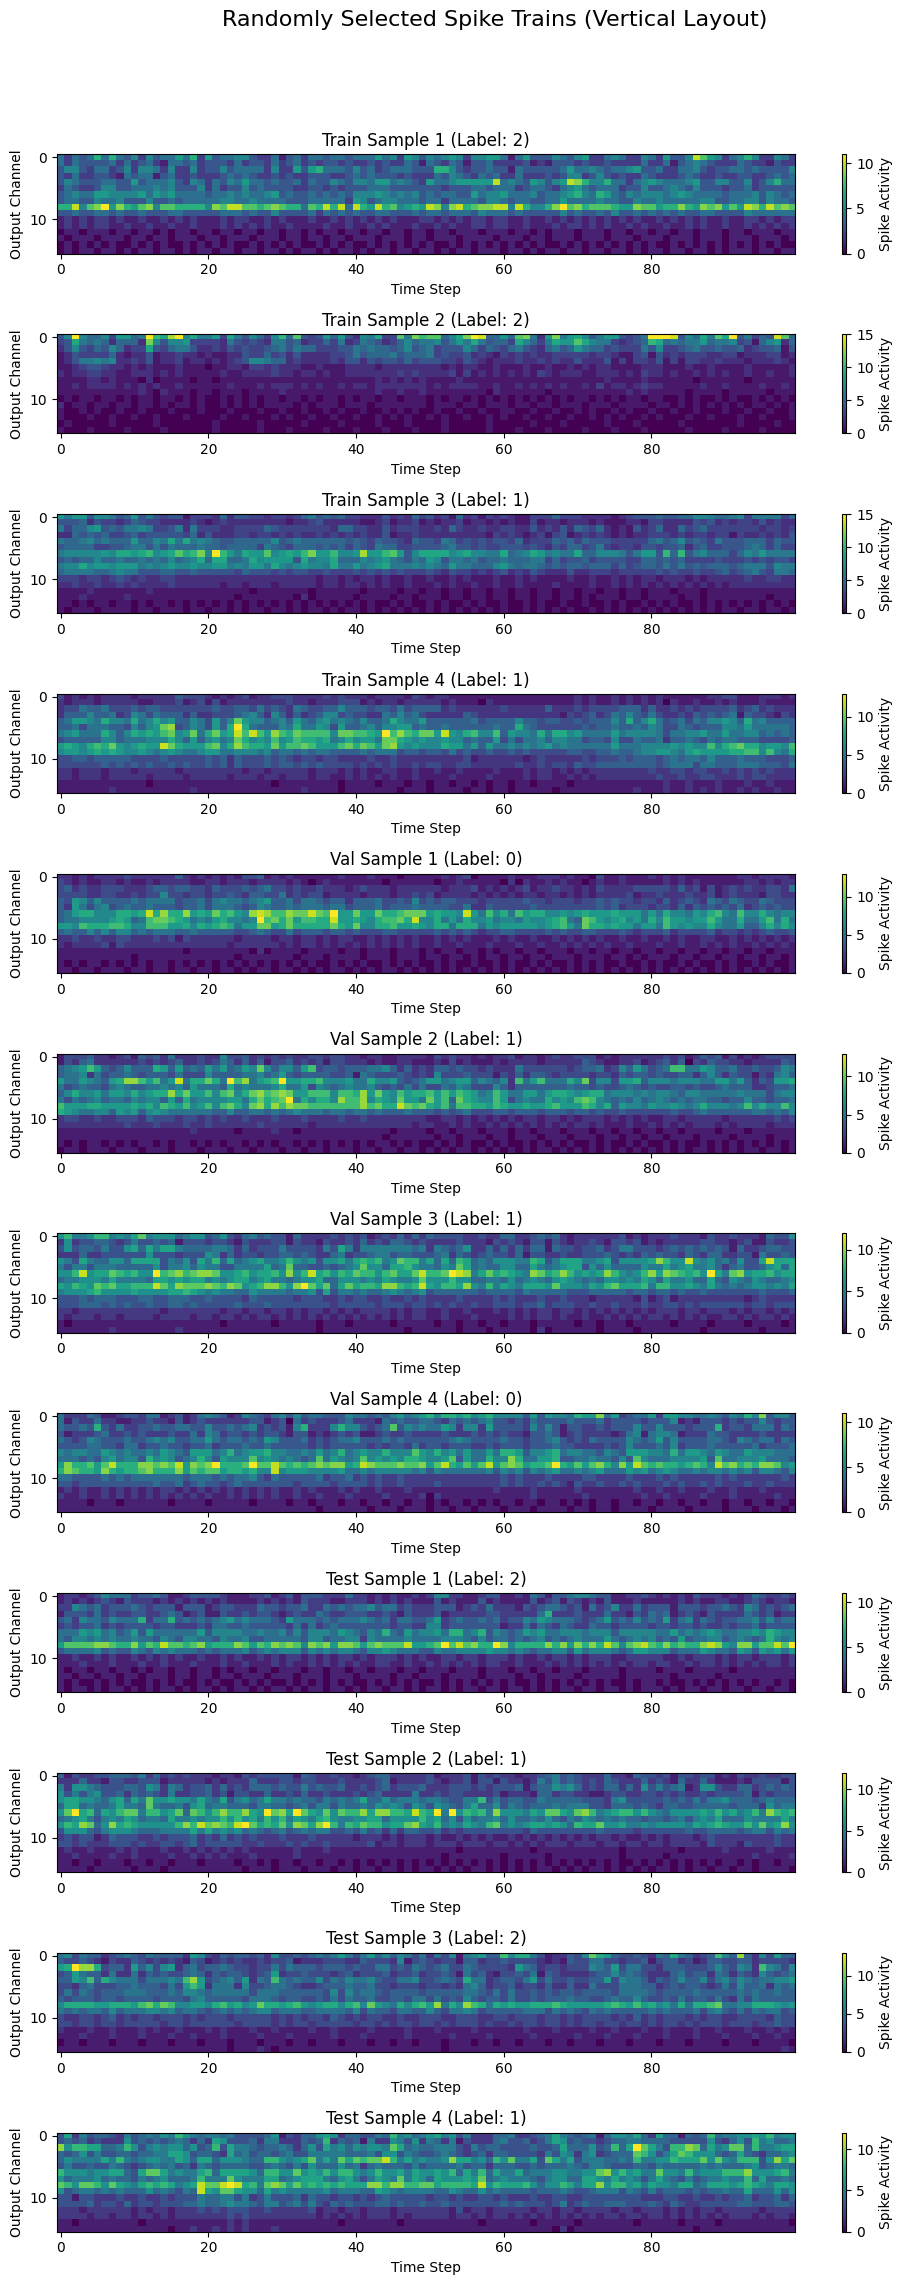

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths for X and y files
file_paths = {
    'train': 'X_train.npy',
    'val': 'X_val.npy',
    'test': 'X_test.npy'
}
label_file_paths = {
    'train': 'y_train.npy',
    'val': 'y_val.npy',
    'test': 'y_test.npy'
}

# Load all the data
data_dict = {}
labels_dict = {}
try:
    for key, path in file_paths.items():
        data_dict[key] = np.load(path)
    for key, path in label_file_paths.items():
        labels_dict[key] = np.load(path)
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all files are in the current directory.")
    exit()

# Number of random samples to plot for each dataset
num_plots_per_dataset = 4
total_plots = num_plots_per_dataset * 3

# Collect random samples and their labels
samples_to_plot = []
labels_to_plot = []
titles_to_plot = []

for dataset_name, dataset_data in data_dict.items():
    total_samples = dataset_data.shape[0]
    
    # Randomly select a few sample indices
    if total_samples >= num_plots_per_dataset:
        random_indices = np.random.choice(total_samples, num_plots_per_dataset, replace=False)
    else:
        random_indices = np.arange(total_samples)

    for i, sample_index in enumerate(random_indices):
        samples_to_plot.append(dataset_data[sample_index])
        labels_to_plot.append(labels_dict[dataset_name][sample_index])
        titles_to_plot.append(f'{dataset_name.capitalize()} Sample {i+1} (Label: {labels_dict[dataset_name][sample_index]})')

# Create a figure with a single column and as many rows as total_plots
fig, axes = plt.subplots(total_plots, 1, figsize=(10, 2 * total_plots))
fig.suptitle('Randomly Selected Spike Trains (Vertical Layout)', fontsize=16)

# Plot each selected sample
for i, (sample_data, title) in enumerate(zip(samples_to_plot, titles_to_plot)):
    ax = axes[i]
    im = ax.imshow(sample_data.T, aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Output Channel')
    fig.colorbar(im, ax=ax, label='Spike Activity')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('vertical_spike_trains.png')